# Model Training Tutorial

Welcome to the model training tutorial! In this tutorial, we will train a neural network to classify tiles from our toy data set and visualize its efficacy. Our model is essentially a wrapper around PyTorch's ResNet 18 deep residual network; the LUNA team modified it to suit their work with tiling the slides. 


In [ ]:
# setup home directory
import os
HOME = os.environ['HOME']

In [205]:
# setup environment 
env DATASET_URL=file:///$HOME/vmount/PRO_12-123/

env: DATASET_URL=file:////home/kohlia/vmount/PRO_12-123/


### Model Training

The model will be used to classify tiles into the different tissue types we've annotated (tumor, stroma and fat). These tissue classifier models can be trained using the `train_tissue_classifier` CLI tool

In [274]:
!train_tissue_classifier --help

2022-05-10 15:09:07,005 - INFO - root - Initalized logger, log file at: data-processing.log
Usage: train_tissue_classifier [OPTIONS] TILE_DATASET_FPATH

  Train a tissue classifier model for all tiles in a slide

  Inputs:
      tile_dataset_fpath: path to tile dataset parquet table
 
  Outputs:
      ray ExperimentAnalysis dataframe and metadata saved to the output
 
  Example:
      train_tissue_classifier /tables/slides/slide_table
          -ne 5
          -nt torchvision.models.resnet18
          -nw 1
          -o results/train_tile_classifier_results

Options:
  -o, --output_dir TEXT           Path to output directory to save results and
                                  logs from Ray
  -ls, --label_set TEXT           Dictionary/json where keys coorespoond to
                                  tissue types and values coorespond to
                                  numerical values
  -lc, --label_col TEXT           Column name in the input dataframe
                               

This CLI tool has a lot of command line arguments. The main input is the labled tile dataset, which is the data used to train and valdiate the model. For validation, the tiles are stratified by patient id and by slide id, and the split is contoleled by the `num_splits` parameter. The `label_set` parameter is used to map the tissue types to numerical quantities. These models can use none, one, or many GPUs/CPUs using Ray. The arguments used to modify the resources are `num_gpus, num_cpus, num_workers, num_cpus_per_worker, num_gpus_per_worker`. If you want to experiment with different hyperparameters, you can supply a list of values to certian arguments, such as `learning_rate` or `batch_size` and Ray will perform a hyperparameter search or sweep accordingly. 

In the following example, we're going to train a ResNet18 model (though any model available from [PyTorch](https://pytorch.org/vision/stable/models.html) can be used) for two epochs. 

In [209]:
%%bash

train_tissue_classifier ~/vmount/PRO_12-123/datasets/PRO_TILES_LABLED/ \
--label_set "{'tumor':0, 'stroma':1, 'fat':2}" \
--label_col regional_label --stratify_col slide_id \
--num_epochs 2 --network 'torchvision.models.resnet18' \
--num_splits 2 \
--batch_size 4 \
-lr 1e-4  \
-cw 1 -gw 0 -nw 2 -ng 0 -nc 4 -ns 1 \
--output_dir ../PRO_12-123/data/toy_data_set/table/tissue_classifier_results 


2022-05-10 13:49:19,165 - INFO - root - Initalized logger, log file at: data-processing.log
2022-05-10 13:49:19,167 - INFO - luna.common.utils - Started CLI Runner wtih <function train_model at 0x7f6133a7b550>
2022-05-10 13:49:19,168 - INFO - luna.common.utils - Validating params...
2022-05-10 13:49:19,169 - INFO - luna.common.utils -  -> Set tile_dataset_fpath (<class 'str'>) = /home/kohlia/vmount/PRO_12-123/datasets/PRO_TILES_LABLED/
2022-05-10 13:49:19,170 - INFO - luna.common.utils -  -> Set output_dir (<class 'str'>) = ../PRO_12-123/data/toy_data_set/table/tissue_classifier_results
2022-05-10 13:49:19,171 - INFO - luna.common.utils -  -> Set label_set (<class 'dict'>) = {'tumor': 0, 'stroma': 1, 'fat': 2}
2022-05-10 13:49:19,173 - INFO - luna.common.utils -  -> Set label_col (<class 'str'>) = regional_label
2022-05-10 13:49:19,176 - INFO - luna.common.utils -  -> Set stratify_col (<class 'str'>) = slide_id
2022-05-10 13:49:19,177 - INFO - luna.common.utils -  -> Set num_splits (<c

2022-05-10 13:52:23,988 - INFO - train_tissue_classifier - Memory usage on this node: 6.3/7.7 GiB
2022-05-10 13:52:23,988 - INFO - train_tissue_classifier - Using FIFO scheduling algorithm.
2022-05-10 13:52:23,988 - INFO - train_tissue_classifier - Resources requested: 3.0/4 CPUs, 0/0 GPUs, 0.0/2.17 GiB heap, 0.0/1.08 GiB objects
2022-05-10 13:52:23,988 - INFO - train_tissue_classifier - Result logdir: /home/kohlia/vmount/PRO_12-123/data/toy_data_set/table/tissue_classifier_results/tune_function_2022-05-10_13-49-23
2022-05-10 13:52:23,988 - INFO - train_tissue_classifier - Number of trials: 1/1 (1 RUNNING)
2022-05-10 13:52:23,988 - INFO - train_tissue_classifier - +---------------------------+----------+------------------+--------------+-----------------+--------------+
2022-05-10 13:52:23,988 - INFO - train_tissue_classifier - | Trial name                | status   | loc              |   batch_size |   learning_rate |   num_epochs |
2022-05-10 13:52:23,988 - INFO - train_tissue_classi

2022-05-10 14:00:49,324 - INFO - train_tissue_classifier - Result logdir: /home/kohlia/vmount/PRO_12-123/data/toy_data_set/table/tissue_classifier_results/tune_function_2022-05-10_13-49-23
2022-05-10 14:00:49,324 - INFO - train_tissue_classifier - Number of trials: 1/1 (1 TERMINATED)
2022-05-10 14:00:49,324 - INFO - train_tissue_classifier - +---------------------------+------------+------------------+--------------+-----------------+--------------+--------+------------------+--------------+------------+--------------+
2022-05-10 14:00:49,324 - INFO - train_tissue_classifier - | Trial name                | status     | loc              |   batch_size |   learning_rate |   num_epochs |   iter |   total time (s) |   train_loss |   val_loss |   _timestamp |
2022-05-10 14:00:49,324 - INFO - train_tissue_classifier - |---------------------------+------------+------------------+--------------+-----------------+--------------+--------+------------------+--------------+------------+-----------

training model
Result for tune_function_ff99e_00000:
  _time_this_iter_s: 332.3070001602173
  _timestamp: 1652190905
  _training_iteration: 1
  date: 2022-05-10_13-55-05
  done: false
  experiment_id: eaa2ec00cb6546179220889ed6c1ec28
  hostname: a6f0744d4bbb
  iterations_since_restore: 1
  node_ip: 172.20.0.3
  pid: 79237
  time_since_restore: 339.93007469177246
  time_this_iter_s: 339.93007469177246
  time_total_s: 339.93007469177246
  timestamp: 1652190905
  timesteps_since_restore: 0
  train_Accuracy: 0.8253129720687866
  train_F1Score: 0.8253129720687866
  train_Precision: 0.8253129720687866
  train_Recall: 0.8253129720687866
  train_loss: 0.4835228884333223
  training_iteration: 1
  trial_id: ff99e_00000
  val_Accuracy: 0.8153364658355713
  val_ConfusionMatrix:
  - - 2498
    - 452
    - 2
  - - 16
    - 1408
    - 0
  - - 16
    - 458
    - 262
  val_F1Score: 0.8153364062309265
  val_Precision: 0.8153364658355713
  val_Recall: 0.8153364658355713
  val_loss: 0.4804891074733613
  


### Results

Now that we have a trained model, we can inspect the output

In [278]:
!ls ../PRO_12-123/data/toy_data_set/table/tissue_classifier_results/

metadata.yml			   tune_function_2022-05-10_13-49-10
tune_function_2022-05-10_05-04-22  tune_function_2022-05-10_13-49-23
tune_function_2022-05-10_13-40-42


For every time the model is trained, Ray will put together a set of output directories to manage your runs. You can inspect the results using Ray's ExperimentAnalysis dataframe by loading a particular output directory. This dataframe will store various performance metrics as well as the hyperparameters used to configure the model among other output metadata

In [288]:
from ray.tune import ExperimentAnalysis
RAY_OUTPUT = "tune_function_2022-05-10_13-49-23" # change this to the output folder you want to insepct
output_dir = "../PRO_12-123/data/toy_data_set/table/tissue_classifier_results"

ray_output_dir = os.path.join(output_dir, RAY_OUTPUT)
analysis = ExperimentAnalysis(ray_output_dir)
display(analysis.results_df)


,train_Accuracy,train_Precision,train_Recall,train_F1Score,train_loss,val_Accuracy,val_Precision,val_Recall,val_F1Score,val_ConfusionMatrix,...,config.num_epochs,config.num_cpus_per_worker,config.tile_dataset_fpath,config.label_col,config.stratify_col,config.network,config.num_splits,config.label_set.tumor,config.label_set.stroma,config.label_set.fat
trial_id,,,,,,,,,,,,,,,,,,,,,
ff99e_00000,0.8794014,0.8794014,0.8794014,0.8794014,0.20686,0.89162755,0.89162755,0.89162755,0.8916275,"[[5428, 456, 20], [78, 2724, 46], [30, 478, 964]]",...,2,1,/home/kohlia/vmount/PRO_12-123/datasets/PRO_TI...,regional_label,slide_id,<function resnet18 at 0x7fa4ebe6cd30>,2,0,1,2


We can use the output to put together a confusion matrix. The calssifier can pretty successfully distinguish tumor tissue from the other classes, but it seems like fat is often mis-classified as stroma. 

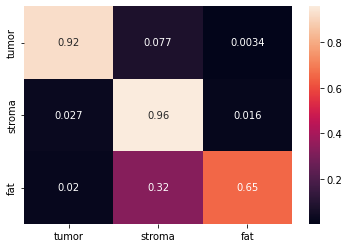

In [286]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

label_dict = {'tumor':0, 'stroma':1, 'fat':2}
labels = list(label_dict.keys())
cm = analysis.results_df['val_ConfusionMatrix'].iloc[0]
# normalize 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
df_cm
sns.heatmap(df_cm, annot=True)
plt.show()


The ray output directory also contains a tensorboard file (`events.out.tf.events.*`) in the `'tune_function_*'` subdirectory that can be used to further evaluate the performance of the model. 


In [343]:
!tree $ray_output_dir
# %load_ext tensorboard
# ! tensorboard --logdir os.path.join(ray_output_dir,'tune_function_ff99e_00000_0_batch_size=4,learning_rate=0.0001,num_epochs=2_2022-05-10_13-49-23') --bind_all

../PRO_12-123/data/toy_data_set/table/tissue_classifier_results/tune_function_2022-05-10_13-49-23
├── basic-variant-state-2022-05-10_13-49-23.json
├── experiment_state-2022-05-10_13-49-23.json
└── tune_function_ff99e_00000_0_batch_size=4,learning_rate=0.0001,num_epochs=2_2022-05-10_13-49-23
    ├── checkpoint_000000
    │   └── checkpoint
    ├── checkpoint_000001
    │   └── checkpoint
    ├── events.out.tfevents.1652190563.a6f0744d4bbb
    ├── params.json
    ├── params.pkl
    ├── progress.csv
    ├── result.json
    ├── stderr
    └── stdout

3 directories, 11 files


This `'tune_function_*'` directory also contains our model checkpoints in the `check_point_*` directories that we'll need for inference. Now, with our trained model and model checkpoints, we can move on the next notebook!
